<h1 style='padding:25px;text-align:center;border-radius:10px;background:black;color:white'>Cats Vs Dogs Using Keras API</h1>

<h2 style='padding:20px;text-align:center;border-radius:10px;background:black;color:white'>Import required libraries / dependencies</h2>

In [1]:
# import required libraries / dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import keras
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import Adam

<h2 style='padding:20px;text-align:center;border-radius:10px;background:black;color:white'>Generate the datasets, both the training and the test sets</h2>

In [2]:
# define the paths to the dataset.
training_path = '../input/cat-and-dog/training_set/training_set/'
test_path = '../input/cat-and-dog/test_set/test_set/'

In [4]:
# Create dataset
image_size = (200, 200)
batch_size = 32

training_set = keras.preprocessing.image.image_dataset_from_directory(
    directory=training_path,
    class_names=['cats', 'dogs'],
    image_size=image_size,
    batch_size=batch_size
)
test_set = keras.preprocessing.image.image_dataset_from_directory(
    directory=test_path,
    class_names=['cats', 'dogs'],
    image_size=image_size,
    batch_size=batch_size,
    
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


<h2 style='padding:20px;text-align:center;border-radius:10px;background:black;color:white'>
    Visualize some images from the training set
</h2>

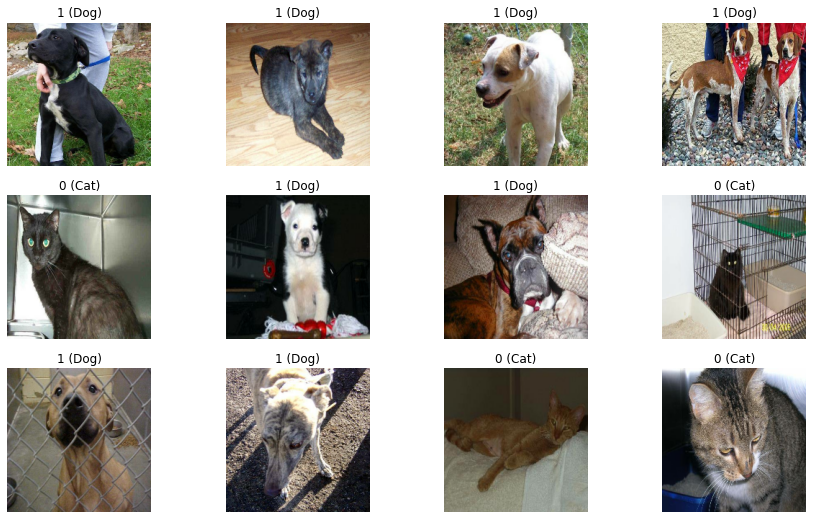

In [6]:
# visualize the training set
plt.figure(figsize=(15, 9))
def cat_or_dog(a):
    if a==0:
        return 'Cat'
    return 'Dog'
    
for images, labels in training_set.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'{int(labels[i])} ({cat_or_dog(int(labels[i]))})')
        plt.axis('off')

<h2 style='padding:20px;text-align:center;border-radius:10px;background:black;color:white'>
    Visualize some images from the test set
</h2>

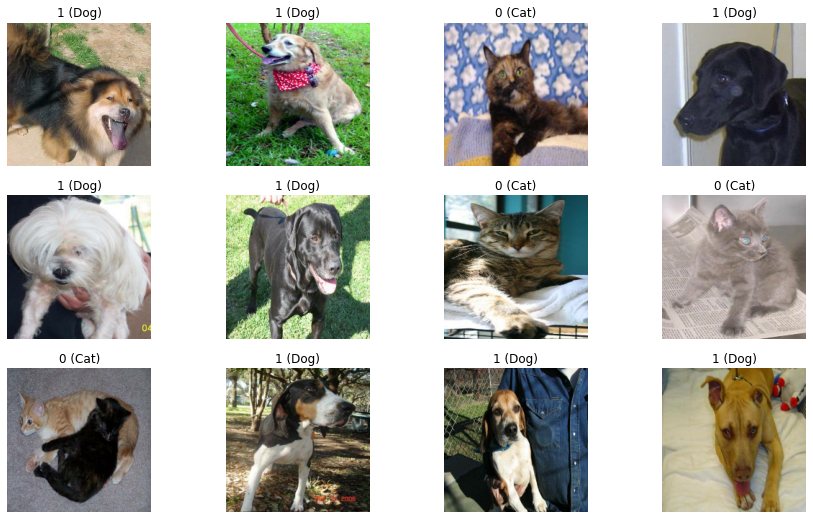

In [7]:
# visualize the test set
plt.figure(figsize=(15, 9))
def cat_or_dog(a):
    if a==0:
        return 'Cat'
    return 'Dog'
    
for images, labels in test_set.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'{int(labels[i])} ({cat_or_dog(int(labels[i]))})')
        plt.axis('off')

<h2 style='padding:20px;text-align:center;border-radius:10px;background:black;color:white'>
    Data Augmentation
</h2>

*Data Augmentation*, in its essence, means to generate new data by modifying existing data.

In [8]:
# define some layers of data augmentation
augmented_data = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1)
])

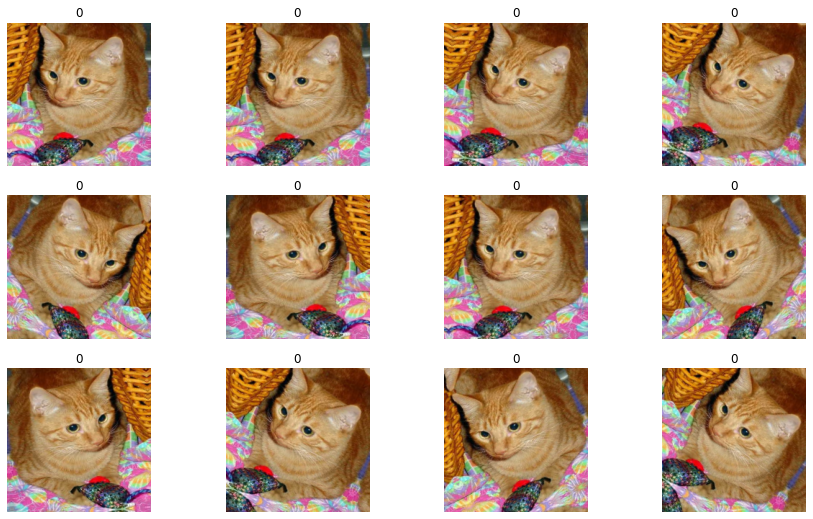

In [9]:
# visualize it
plt.figure(figsize=(15, 9))
    
for images, labels in test_set.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        augmented_image = augmented_data(images[0])
        plt.imshow(augmented_image.numpy().astype('uint8'))
        plt.title(int(labels[0]))
        plt.axis('off')


----

<h2 style='padding:20px;text-align:center;border-radius:10px;background:black;color:white'>
    Build a model
</h2>

In [10]:
# build the model
model = Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(200, 200, 3)),
    
    # preprocessing
    layers.CenterCrop(180, 180),
    layers.Rescaling(scale=1./255),
    
    
    # applying image data augmentation
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Flatten(),
    
    # output layer
    layers.Dense(1, activation='sigmoid')
])

In [11]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 128)     3584      
_________________________________________________________________
center_crop (CenterCrop)     (None, 180, 180, 128)     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 128)     0         
_________________________________________________________________
random_flip_1 (RandomFlip)   (None, 180, 180, 128)     0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 180, 180, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 256)      

<h2 style='padding:20px;text-align:center;border-radius:10px;background:black;color:white'>
    Train the model
</h2>

In [13]:
epochs = 50
# callbacks (save the model at each epoch)
callbacks = [
    keras.callbacks.ModelCheckpoint("checkpoints/model_at_{epoch}.h5"),
]

# compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# fit the model
model.fit(training_set, validation_data=test_set, epochs=epochs, callbacks=callbacks, verbose=2)

Epoch 1/50


2022-11-16 07:14:45.972157: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-11-16 07:14:49.161510: I tensorflow/core/util/cuda_solvers.cc:180] Creating CudaSolver handles for stream 0x5557f2dd7b20


251/251 - 68s - loss: 0.6943 - accuracy: 0.5189 - val_loss: 0.6865 - val_accuracy: 0.5299
Epoch 2/50
251/251 - 61s - loss: 0.6820 - accuracy: 0.5773 - val_loss: 0.6766 - val_accuracy: 0.5996
Epoch 3/50
251/251 - 60s - loss: 0.6685 - accuracy: 0.5914 - val_loss: 0.6545 - val_accuracy: 0.6228
Epoch 4/50
251/251 - 60s - loss: 0.6452 - accuracy: 0.6355 - val_loss: 0.6499 - val_accuracy: 0.6337
Epoch 5/50
251/251 - 60s - loss: 0.6311 - accuracy: 0.6496 - val_loss: 0.6359 - val_accuracy: 0.6639
Epoch 6/50
251/251 - 60s - loss: 0.6063 - accuracy: 0.6746 - val_loss: 0.5994 - val_accuracy: 0.6886
Epoch 7/50
251/251 - 60s - loss: 0.5780 - accuracy: 0.7009 - val_loss: 0.5890 - val_accuracy: 0.6970
Epoch 8/50
251/251 - 60s - loss: 0.5652 - accuracy: 0.7119 - val_loss: 0.5525 - val_accuracy: 0.7187
Epoch 9/50
251/251 - 60s - loss: 0.5505 - accuracy: 0.7213 - val_loss: 0.5466 - val_accuracy: 0.7360
Epoch 10/50
251/251 - 60s - loss: 0.5425 - accuracy: 0.7280 - val_loss: 0.5275 - val_accuracy: 0.7435


<h2 style='padding:20px;text-align:center;border-radius:10px;background:black;color:white'>
    Visualize the predicted images
</h2>

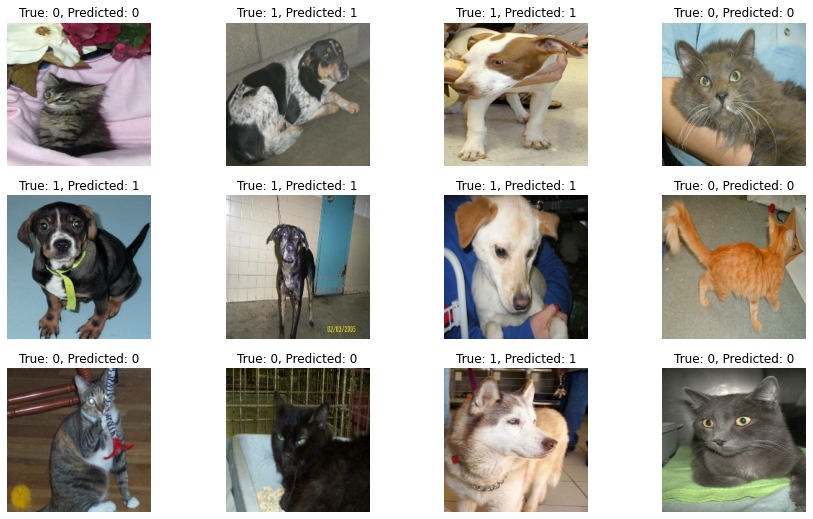

In [16]:
# visualize the predicted data
loaded_model = keras.models.load_model('checkpoints/model_at_50.h5')

plt.figure(figsize=(15, 9))

def predict(imgs):
    pred = []
    for i in loaded_model.predict(images.numpy().astype('uint8')):
        if i[0] > .5:
            pred.append(1)
        else:
            pred.append(0)
    return pred
    
for images, labels in test_set.take(1):
    pred = predict(images)
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'True: {int(labels[i])}, Predicted: {pred[i]}')
        plt.axis('off')

---

<div style='border-radius:10px;background:black;color:white;padding:25px'>
    Hey,<br>
    Thanks for your time reviewing my notebook.<br>
    If you liked it, an upvote will be a big support to me, and please don't hesitate to leave a comment if you have anything to share about the kernel. <br>
    Also, if you have time, please review my other works <a href='https://www.kaggle.com/hikmatullahmohammadi/code' target='_blank'>here</a>.<br><br>
    Keep building :)
    
</div>